$nCycles$ - number of simulation cycles

$nBuyers$  - number of the buyers

$nSellers$ - number of the sellers

$seed$ - the seed of the random numbers

$d_0$ - the lower bound for random uniform numbers, both for the buyers and the sellers in the warming up phase; in the running phase, the lower bound is $0$

$d_{1}$ - the upper bound for random uniform numbers for the buyers, in the warming up phase

$d_{1_{true}}$ - the upper bound for random uniform numbers for the buyers, when the deal succeeds

$d_{1_{false}}$ - the upper bound for random uniform numbers for the buyers, when the deal succeeds

$d_2$ - the upper bound for random uniform numbers for the sellers, in the warming up phase

$d_{2_{true}}$ - the upper bound for random uniform numbers for the sellers, when the deal succeeds

$d_{2_{false}}$ - the upper bound for random uniform numbers for the sellers, when the deal succeeds


initial buyer $i$ reservation price, different for each buyer: $p_{b,i}=\frac{1} {1 + u_i}$ with $u_i\sim\mathcal{U}(d_0,d_1)$

initial seller j reservation price, different for each seller: $p_{s,j}=1 + u_j$ with $u_j\sim\mathcal{U}(d_0,d_2)$

the running prices are changing following the correction coefficients:

$c_b=\frac{1} {1 + u_b}$ or $c_b=1 + u_b$ with $u_b\sim\mathcal{U}(0,d_1)$

$c_s=\frac{1} {1 + u_s}$ or $c_s=1 + u_s$ with $u_s\sim\mathcal{U}(0,d_2)$

### corrupting the hayekian mechanism

$buyerThreshold$ - under this number of failures, a special price correction occurs, multiplying the buyer price by $c_b=1 + u_b$ with $u_b\sim\mathcal{U}(0,d_1)$

$sellerThreshold$ - under this number of failures, a special price correction occurs, multiplying the seller price by $c_s=\frac{1} {1 + u_s}$ with $u_s\sim\mathcal{U}(0,d_2)$

In [1]:
%pylab inline
import statistics as s
import numpy as np
import pylab as plt
from IPython.display import clear_output
import time
import math

Populating the interactive namespace from numpy and matplotlib


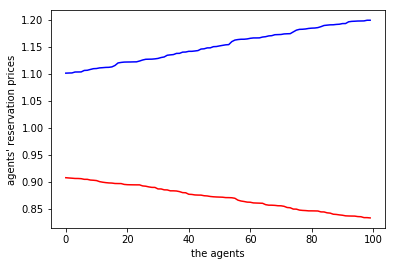

In [17]:
# warming up for the corrupted versione

nCycles=10000
nBuyers= 100
nSellers=100

seed=111
np.random.seed(seed)

d0=0.1
d1=0.2
d2=0.2
d1true=0.2
d2true=0.2
d1false=0.2
d2false=0.2

sellerThreshold=-1
buyerThreshold =-10

buyerPriceList=[]
sellerPriceList=[]

for i in range(nBuyers):
    buyerPriceList.append([1/(1+np.random.uniform(d0,d1)),0])
for j in range(nSellers):
    sellerPriceList.append([1+np.random.uniform(d0,d2),0])
    
#zip is an iterator and * means iteratable    
plt.plot(list(zip(*sorted(buyerPriceList,reverse=True)))[0],"r");
plt.plot(list(zip(*sorted(sellerPriceList)))[0],"b");
xlabel("the agents");
ylabel("agents' reservation prices");

time 10000 and n. of exchanges in the last cycle 51
mean and var of exchange prices in the last cycle: 2.505e-01, 8.235e-03


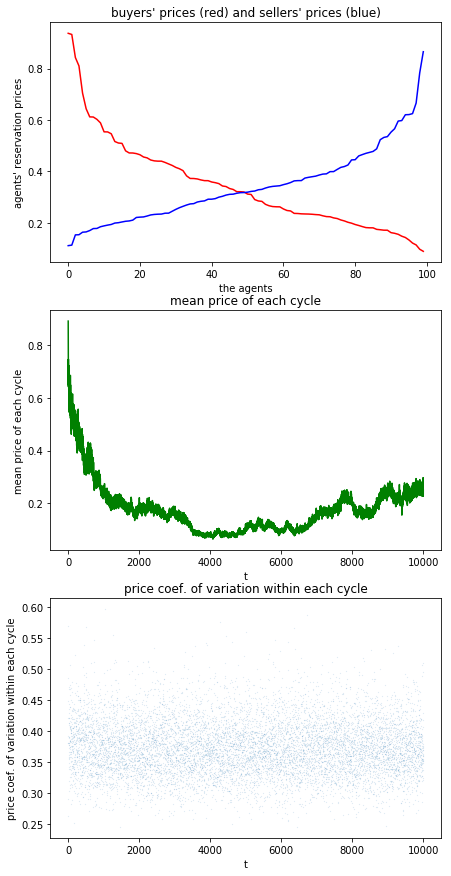

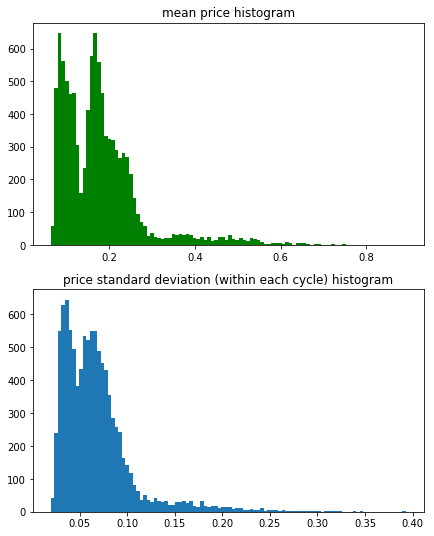

In [18]:
# corrupted hayekian perspective
meanPrice_ts=[]
meanPriceStDev_ts=[]
meanPriceVar_ts=[]

for t in range(1,nCycles+1):    
    dealPrices=[]
    agNum=max(nBuyers,nSellers)
    for n in range(agNum):

        i = np.random.randint(0,nBuyers)
        j = np.random.randint(0,nSellers)
        
        if buyerPriceList[i][0]>=sellerPriceList[j][0]:
            dealPrices.append(sellerPriceList[j][0])
            buyerPriceList[i][0] *=1/(1+np.random.uniform(d1true))
            buyerPriceList[i][1] +=1 # success
            sellerPriceList[j][0]*=1+np.random.uniform(d2true)
            sellerPriceList[j][1]+=1 # success
        else:
            buyerPriceList[i][0] *=1+np.random.uniform(d1false)
            buyerPriceList[i][1] -=1 # failure
            sellerPriceList[j][0]*=1/(1+np.random.uniform(d2false))
            sellerPriceList[j][1]-=1 # failure
            
        # corrections
        
        if buyerPriceList[i][1]  < buyerThreshold:
            buyerPriceList[i][0] *=1+np.random.uniform(d1false)
            buyerPriceList[i][1] +=1
        if sellerPriceList[j][1] < sellerThreshold:
            sellerPriceList[j][0]*=1/(1+np.random.uniform(d2false))
            sellerPriceList[j][1]+=1
            
           
    if len(dealPrices) > 2:
        meanPrice_ts.append(s.mean(dealPrices))
        meanPriceVar_ts.append(s.variance(dealPrices))
        meanPriceStDev_ts.append(s.stdev(dealPrices))
    else:
        meanPrice_ts.append(np.nan)
        meanPriceStDev_ts.append(np.nan)

    if t % 1000==0:
        clear_output()
        print('time', t, 'and n. of exchanges in the last cycle', \
              len(dealPrices))
        print(\
        'mean and var of exchange prices in the last cycle: %1.3e, %1.3e' %\
              (meanPrice_ts[-1],meanPriceVar_ts[-1]))

        plt.figure(1,figsize=(7,15),clear=True)

        plt.subplot(311)
        plt.plot(list(zip(*sorted(buyerPriceList, reverse=True)))[0],"r")
        plt.plot(list(zip(*sorted(sellerPriceList)))[0],"b")
        plt.title(\
            "buyers' prices (red) and sellers' prices (blue)")
        xlabel("the agents")
        ylabel("agents' reservation prices")

        plt.subplot(312)
        plt.title("mean price of each cycle")
        xlabel("t")
        ylabel("mean price of each cycle")
        plt.plot(meanPrice_ts,"g")
        
        plt.subplot(313)
        plt.title("price coef. of variation within each cycle")
        coefOfVariation=[]
        for m in range(len(meanPriceStDev_ts)):
            coefOfVariation.append(meanPriceStDev_ts[m]/
                                   meanPrice_ts[m])
        plt.plot(coefOfVariation,".",markersize=0.1)
        xlabel("t")
        ylabel("price coef. of variation within each cycle")
        show()
        #time.sleep(0.1)

# hist crashes with NaN
meanPrice_ts_hist=[]
for k in range(len(meanPrice_ts)): 
    if not math.isnan(meanPrice_ts[k]):
        meanPrice_ts_hist.append(meanPrice_ts[k])
meanPriceStDev_ts_hist=[]
for k in range(len(meanPriceStDev_ts)): 
    if not math.isnan(meanPriceStDev_ts[k]):
        meanPriceStDev_ts_hist.append(meanPriceStDev_ts[k])
plt.figure(2,figsize=(7,9))
plt.subplot(211)
if meanPrice_ts_hist != []:
    plt.title("mean price histogram")
    plt.hist(meanPrice_ts_hist,100,color="g");
plt.subplot(212)
if meanPriceStDev_ts_hist != []:
    plt.title("price standard deviation (within each cycle) histogram")
    plt.hist(meanPriceStDev_ts_hist,100);

In [ ]:
list(zip(*sorted(buyerPriceList, reverse=True)))[1]